# Cleaning US Census Data

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple `csv` files. They didn't use pandas, they would just look through these `csv` files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into `pandas` and into reasonable shape so that you can make these histograms?

## Inspect the Data!

1. It will be easier to inspect this data once we have it in a DataFrame. You can't even call `.head()` on these `csv`s! How are you supposed to read them?

In [604]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

state_files = glob.glob("states*.csv")

state_df_list = []

for state in state_files:
  df = pd.read_csv(state)
  state_df_list.append(df)

df = pd.concat(state_df_list).reset_index(drop=True)
df.head(10)

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F
5,5,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,"$64,657.80",2648667M_2630239F
6,0,Colorado,5278906,20.78%,69.90%,3.55%,0.57%,2.66%,NaN,"$64,657.80",2648667M_2630239F
7,1,Connecticut,3593222,15.60%,67.68%,10.35%,0.13%,4.02%,0.02%,"$76,146.56",1751607M_1841615F
8,2,Delaware,926454,8.82%,64.63%,20.74%,0.26%,3.27%,NaN,"$61,827.98",448413M_478041F
9,3,District of Columbia,647484,9.17%,33.10%,51.78%,0.20%,3.38%,0.03%,"$75,466.36",306674M_340810F


2. Look at the `.columns` and the `.dtypes` of the `us_census` DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [605]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  60 non-null     int64 
 1   State       60 non-null     object
 2   TotalPop    60 non-null     int64 
 3   Hispanic    60 non-null     object
 4   White       60 non-null     object
 5   Black       60 non-null     object
 6   Native      60 non-null     object
 7   Asian       60 non-null     object
 8   Pacific     55 non-null     object
 9   Income      60 non-null     object
 10  GenderPop   60 non-null     object
dtypes: int64(2), object(9)
memory usage: 5.3+ KB


## Regex to the Rescue

3. Use regex to turn the `Income` column into a format that is ready for conversion into a numerical type.

In [606]:
df["Income"] = df["Income"].str.replace("[$,]", "", regex=True)
df["Income"] = pd.to_numeric(df["Income"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  60 non-null     int64  
 1   State       60 non-null     object 
 2   TotalPop    60 non-null     int64  
 3   Hispanic    60 non-null     object 
 4   White       60 non-null     object 
 5   Black       60 non-null     object 
 6   Native      60 non-null     object 
 7   Asian       60 non-null     object 
 8   Pacific     55 non-null     object 
 9   Income      60 non-null     float64
 10  GenderPop   60 non-null     object 
dtypes: float64(1), int64(2), object(8)
memory usage: 5.3+ KB


4. Look at the `GenderPop` column. We are going to want to separate this into two columns, the `Men` column, and the `Women` column.

   Split the column into those two new columns using `str.split` and separating out those results.

In [607]:
gender_splitted = df["GenderPop"].str.split("_")
df["Men"] = gender_splitted.str.get(0)
df["Women"] = gender_splitted.str.get(1)

5. Convert both of the columns into numerical datatypes.

   There is still an `M` or an `F` character in each entry! We should remove those before we convert.

In [608]:
df["Men"] = df["Men"].str.replace("M", "", regex=True)
df["Men"] = pd.to_numeric(df["Men"])

df["Women"] = df["Women"].str.replace("F", "", regex=True)
df["Women"] = pd.to_numeric(df["Women"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  60 non-null     int64  
 1   State       60 non-null     object 
 2   TotalPop    60 non-null     int64  
 3   Hispanic    60 non-null     object 
 4   White       60 non-null     object 
 5   Black       60 non-null     object 
 6   Native      60 non-null     object 
 7   Asian       60 non-null     object 
 8   Pacific     55 non-null     object 
 9   Income      60 non-null     float64
 10  GenderPop   60 non-null     object 
 11  Men         60 non-null     int64  
 12  Women       57 non-null     float64
dtypes: float64(2), int64(3), object(8)
memory usage: 6.2+ KB


6. Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you've wasted your whole day cleaning your data with no results to show!

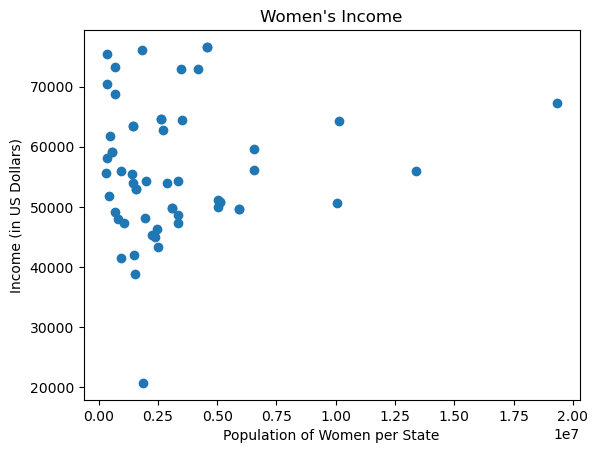

<Figure size 640x480 with 0 Axes>

In [609]:
plt.scatter(df["Women"], df["Income"])
plt.title("Women's Income")
plt.xlabel("Population of Women per State")
plt.ylabel("Income (in US Dollars)")
plt.show()
plt.clf()

7. You want to double check your work. You know from experience that these monstrous csv files probably have `nan` values in them! Print out your column with the number of women per state to see.

In [610]:
print(f"Rows in Women column: {df["Women"].count()}")
print(f"Rows in TotalPop column: {df["TotalPop"].count()}")
print()

# df['Women'] = df['Women'].fillna(df['TotalPop'] - df['Men'])
df = df.fillna(value=dict(Women= df["TotalPop"] - df["Men"]))

print("Rows after filling")
print(f"Rows in Women column: {df["Women"].count()}")
print(f"Rows in TotalPop column: {df["TotalPop"].count()}")


Rows in Women column: 57
Rows in TotalPop column: 60

Rows after filling
Rows in Women column: 60
Rows in TotalPop column: 60


8. We forgot to check for duplicates! Use `.duplicated()` on your `census` DataFrame to see if we have duplicate rows in there.

In [611]:
duplicates_rows = df.duplicated(subset=df.columns[1:])
duplicates_rows.value_counts()

False    51
True      9
Name: count, dtype: int64

9. Drop those duplicates using the `.drop_duplicates()` function.

In [612]:
# subset=[State, TotalPop, Hispanic, White, Black, Native, Asian, Pacific, Income, GenderPop, Men, Women]
df = df.drop_duplicates(subset=df.columns[1:])
duplicates_rows = df.duplicated(subset=df.columns[1:])
duplicates_rows.value_counts()

False    51
Name: count, dtype: int64

10. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

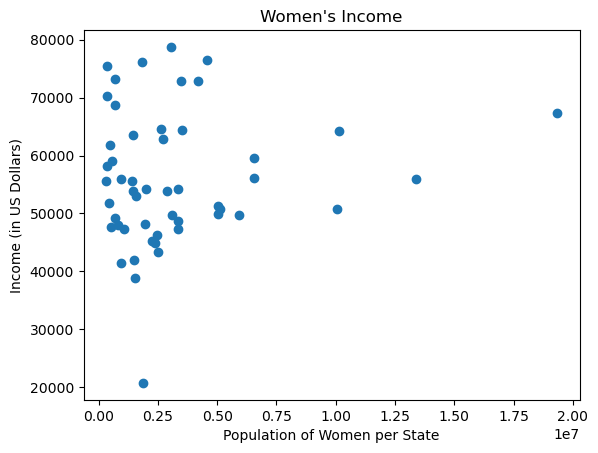

<Figure size 640x480 with 0 Axes>

In [613]:
plt.scatter(df["Women"], df["Income"])
plt.title("Women's Income")
plt.xlabel("Population of Women per State")
plt.ylabel("Income (in US Dollars)")
plt.show()
plt.clf()

## Histogram of Races

11. Now your boss wants you to make a bunch of histograms out of the race data that you have. Look at the `.columns` again to see what the race categories are.

In [614]:
df.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093M_2489527F,2341093,2489527.0
1,1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160M_349215F,384160,349215.0
2,2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088M_3342840F,3299088,3342840.0
3,3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913M_1506295F,1451913,1506295.0
4,4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135M_19334329F,19087135,19334329.0


12. Try to make a histogram for each one!

    You will have to get the columns into the numerical format, and those percentage signs will have to go.

In [615]:
for index, race in enumerate(df.columns[3:9]):
  df[race] = df[race].str.replace("%", "", regex=True)
  df[race] = pd.to_numeric(df[race])
  if df[race].isnull().any():
    df[race] = df[race].fillna(100 - df[[col for col in df.columns[3:9] if col != df.columns[3:9][index]]].sum(axis=1))

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 59
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  51 non-null     int64  
 1   State       51 non-null     object 
 2   TotalPop    51 non-null     int64  
 3   Hispanic    51 non-null     float64
 4   White       51 non-null     float64
 5   Black       51 non-null     float64
 6   Native      51 non-null     float64
 7   Asian       51 non-null     float64
 8   Pacific     51 non-null     float64
 9   Income      51 non-null     float64
 10  GenderPop   51 non-null     object 
 11  Men         51 non-null     int64  
 12  Women       51 non-null     float64
dtypes: float64(8), int64(3), object(2)
memory usage: 5.6+ KB


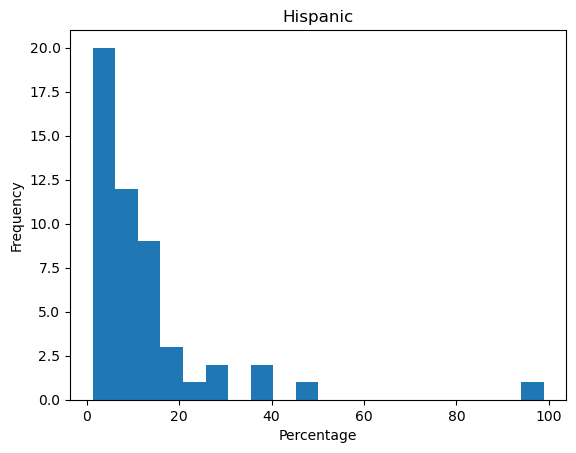

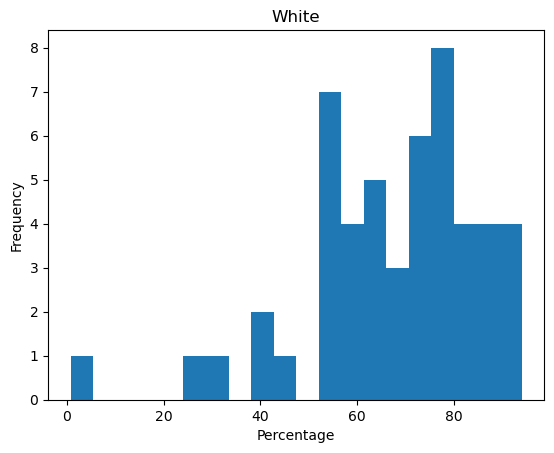

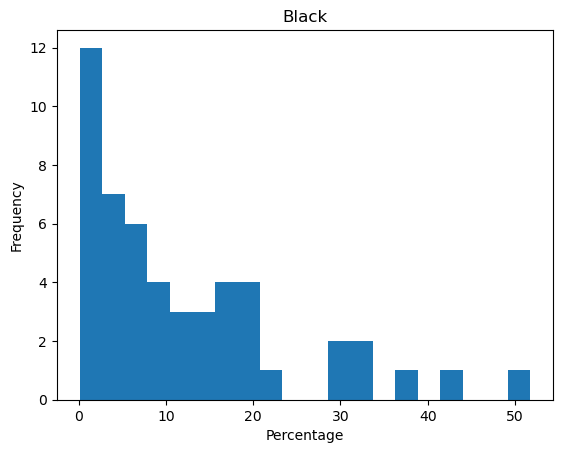

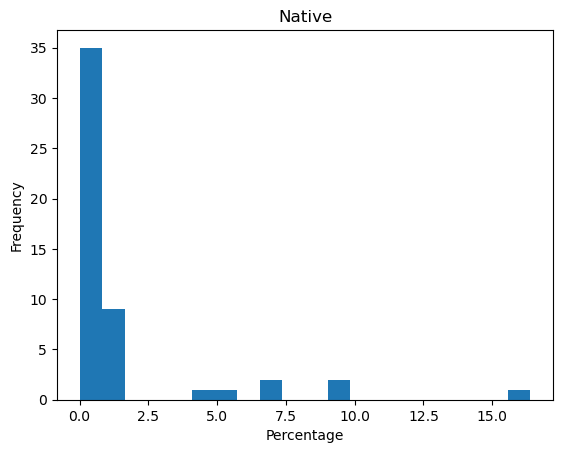

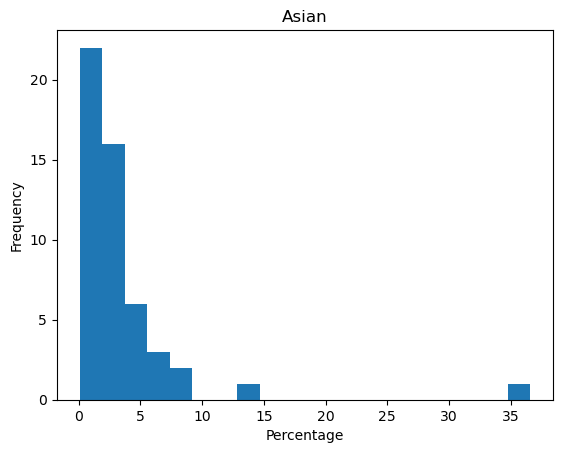

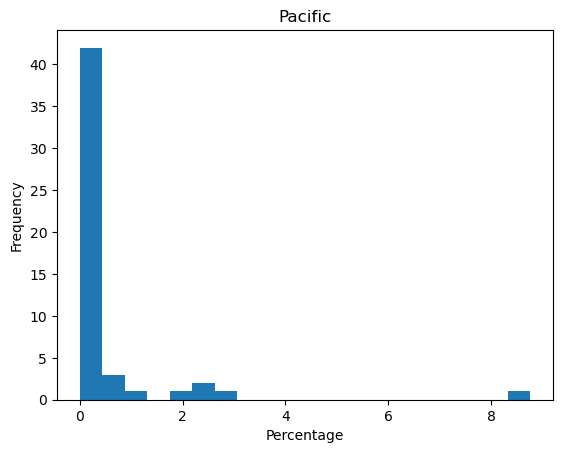

<Figure size 640x480 with 0 Axes>

In [616]:
for race in df.columns[3:9]:
  plt.hist(df[race], bins=20)
  plt.xlabel("Percentage")
  plt.ylabel("Frequency")
  plt.title(race)
  plt.show()
  plt.clf()